<a href="https://colab.research.google.com/github/BYOONANIWE-Philip-Winner/AI-in-Chest-X-rays/blob/main/model_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = '/content/drive/MyDrive/data_xray/data_xray/train'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 3 classes.
Using 800 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 3 classes.
Using 200 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['healthy', 'pneumonia', 'tb']


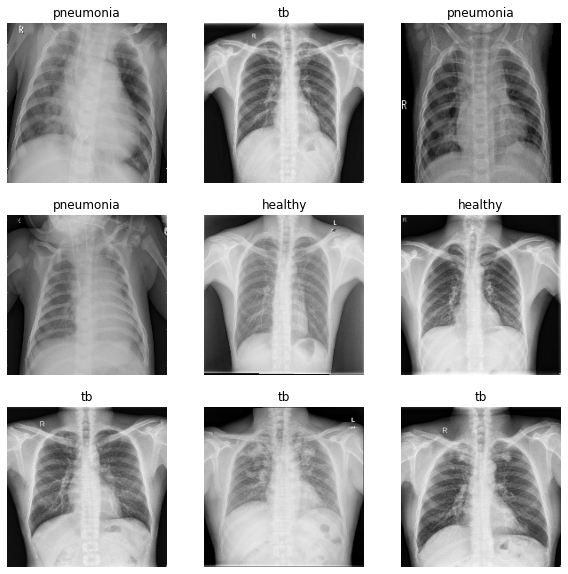

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

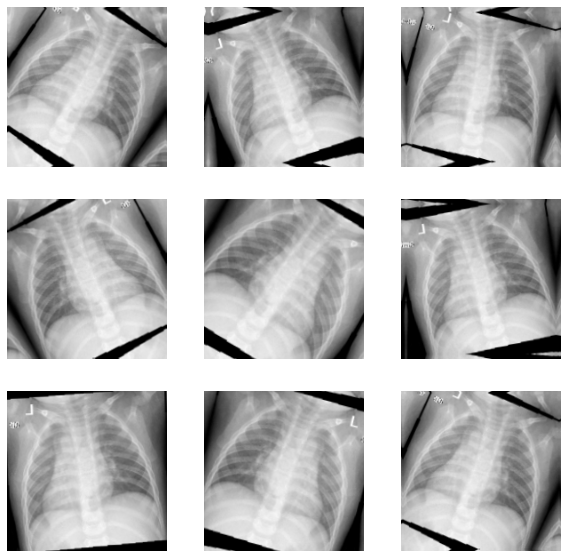

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 3
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
25/25 [==============================] - 287s 3s/step - loss: 1.4947 - accuracy: 0.3922 - val_loss: 0.9053 - val_accuracy: 0.5950
Epoch 2/15
25/25 [==============================] - 1s 23ms/step - loss: 0.7819 - accuracy: 0.7083 - val_loss: 0.4405 - val_accuracy: 0.8100
Epoch 3/15
25/25 [==============================] - 1s 23ms/step - loss: 0.4892 - accuracy: 0.7855 - val_loss: 0.3595 - val_accuracy: 0.8350
Epoch 4/15
25/25 [==============================] - 1s 22ms/step - loss: 0.4608 - accuracy: 0.7992 - val_loss: 0.3638 - val_accuracy: 0.8400
Epoch 5/15
25/25 [==============================] - 1s 22ms/step - loss: 0.5019 - accuracy: 0.7820 - val_loss: 0.4113 - val_accuracy: 0.7550
Epoch 6/15
25/25 [==============================] - 1s 22ms/step - loss: 0.4826 - accuracy: 0.7811 - val_loss: 0.3190 - val_accuracy: 0.8450
Epoch 7/15
25/25 [==============================] - 1s 22ms/step - loss: 0.4102 - accuracy: 0.8315 - val_loss: 0.3271 - val_accuracy: 0.8750
Epoch 8/15
25

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/model_2X.h5')

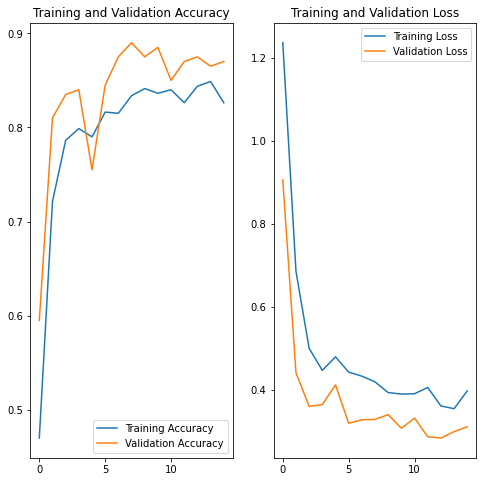

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_dir = '/content/drive/MyDrive/test'

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/model_2X.h5')

In [ ]:
testData = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32)

Found 62 files belonging to 3 classes.


In [ ]:
tb_dir = '/content/drive/My Drive/test/test/tb/MCUCXR_0162_1.png'
h_dir = '/content/drive/My Drive/test/test/healthy/MCUCXR_0002_0.png'
p_dir = '/content/drive/My Drive/test/test/pneumonia/person101_bacteria_484.png'

In [ ]:
paths = [tb_dir, h_dir, p_dir]
for path in paths:
  img = keras.preprocessing.image.load_img(
    path, target_size=(180, 180))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))


This image most likely belongs to tuberculosis with a 98.20 percent confidence.
This image most likely belongs to healthy with a 62.51 percent confidence.
This image most likely belongs to pneumonia with a 91.19 percent confidence.


In [ ]:
from sklearn.metrics import confusion_matrix
predictions = np.array([])
labels =  np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, model.predict_classes(x)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

you =tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


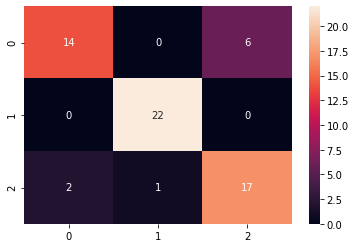

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report

sns.heatmap(you, annot = True)

In [ ]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78        20
         1.0       0.96      1.00      0.98        22
         2.0       0.74      0.85      0.79        20

    accuracy                           0.85        62
   macro avg       0.86      0.85      0.85        62
weighted avg       0.86      0.85      0.85        62

